### Model Usage


Both Pytorch and Keras (TensorFlow) are heralded for their ability to allow users to build models spanning a variety of use cases without much hassle; they have quite a lot of similarities and are not without their differences either.

To comprehensively discuss the distinctions we will scrutinize both frameworks separately building on the same use case, before doing so we will discuss some initial differences regarding module usage.

In [1]:
import tensorflow as tf
import numpy as np
import torch
import torch.nn as nn
from tensorflow.keras import layers
from tensorflow.keras import Model
import time

Strictly speaking about model building, both frameworks contain a vast variety of building blocks present in DL models, such as linear layers and convolutional layers. Users build models by instantiating these modules and chaining them in succession. Their instantiation requires the user to input certain parameters relating to the details of that part of the model.

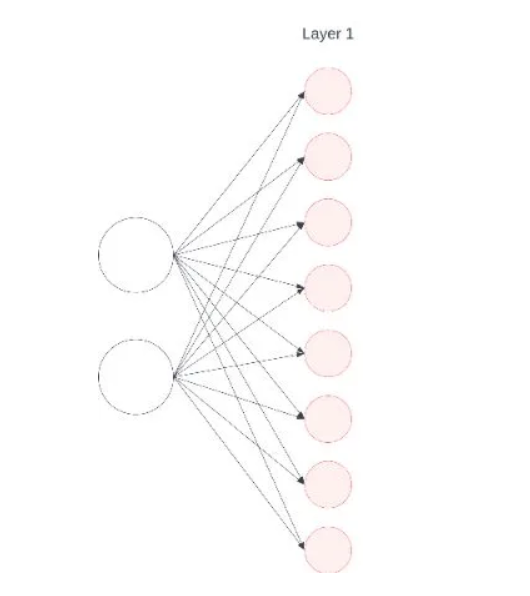

A linear layer would normally need two parameters, the number of inputs, and the number of neurons in the layer (number of outputs). Both Keras and PyTorch handle these inputs in different ways. For the layer above, it can be seen that there are 2 inputs, and 8 neurons (or outputs), This is how the following layer would be defined in both PyTorch and Tensorflow (Keras):

In [2]:
ll_torch = nn.Linear(in_features=2, out_features=8)
ll_keras = layers.Dense(units=8)

# One difference that can be seen here is the need to specify the number
# of input arguments in PyTorch which is not the case in Keras. Keras
# will automatically infer the inputs during runtime

PyTorch provides its DL tools from the nn module. Similarly, TensorFlow DL tools can be found within the tensorflow.keras.layers module.

### Model Building Example

We will be working on a real-world dataset to solve a multi-class classification problem, just to provide some background. identifying/segregating or allocating samples to a class to which they may belong using sample data is known as a classification problem. An example of this would be identifying pet photographs as belonging to a dog, cat, or hamster.

For our problem, we will be classifying between 3 types of flowers using 4 attributes about them — [the Iris dataset](https://www.kaggle.com/datasets/uciml/iris).
Our model model contains 4 layers: 1 input layer, 2 hidden layers, and 1 output layer.  

#### PyTorch

PyTorch provides a unified approach to model construction, primarily achieved through the use of classes (so some knowledge of object-oriented programming will be required). This involves defining the necessary operations within the __init__ function — specifying the model's components, and outlining how these operations are applied to input data in the forward function.

In [3]:
class SimpleClassifier(nn.Module):

  def __init__(self, input_size, num_classes,hidden_size=8):

    super(SimpleClassifier, self).__init__()
    self.layer_1 = nn.Linear(in_features=input_size, out_features=hidden_size)
    self.scaling_factor = torch.tensor(1.0, requires_grad=True)
    self.layer_2 = nn.Linear(in_features=hidden_size, out_features=hidden_size)
    self.output = nn.Linear(hidden_size, num_classes)
    self.relu = nn.ReLU()

# The forward method defines how the input x will interact with our
# model’s components
  def forward(self, x):

    x = self.layer_1(x)   # input x be passed into the first linear layer
    x = self.relu(x)      # ReLU activation function is applied to the intermediate output
    x = self.layer_2(x)   # passed through the second layer
    x = self.relu(x)      # ReLU activation.
    x = self.scaling_factor * x
    x = self.output(x)    # passed through the output layer

iris_model = SimpleClassifier(input_size=4, num_classes=3)



It should be highlighted that the actions carried out in this network are simple in the sense that no further processing is applied to the intermediate outputs. As a result, less lines of code may be used to write the same model.

In [4]:
# While this doesn’t count as a different way of defining a model in PyTorch,
# it highlights an import tool from the nn module that allows the chaining
# of “sequential” operations using the Sequential() class.

class SuperSimpleClassifier(nn.Module):

  def __init__(self, input_size, num_classes,hidden_size=8):
    super(SuperSimpleClassifier, self).__init__()
    self.model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )
  def forward(self, x):
    return self.model(x)

With its class-based approach, PyTorch is often tagged as being a Pythonic framework where model building follows principles of the Python programming language. As a result it is also possible to inherit from separate abstract classes as we can see below

In [5]:
class BasicClassifier():

# simple abstract class that provides a method which gives class probabilities,
# it uses the num_classes attribute to determine whether it's a binary or a
# multi-class classification problem before returning the class probabilities.

  def predict_probability(self, x):

    y = self(x)
    if self.num_classes == 1:
      y = nn.Sigmoid()(x)
    else:
      y = nn.Softmax(dim=1)(x)

    return y

class SuperSimpleClassifier(nn.Module, BasicClassifier):

  def __init__(self, input_size, num_classes,hidden_size=8):

    super().__init__()
    self.num_classes = num_classes
    self.model = nn.Sequential(
        nn.Linear(input_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, hidden_size),
        nn.ReLU(),
        nn.Linear(hidden_size, num_classes)
    )

  def forward(self, x):

    return self.model(x)



All in all, PyTorch provides a simple yet flexible way for users to define models, however, at times it could get a bit boiler-platey.

#### TensorFlow

On the other hand, TensorFlow provides 3 different ways in which a model can be defined with increasing felxibility and room for customisation. As a result this is a comfortable choice for both beginners as well as advanced programmers.
1. Sequential API
2. Functional API
3. Model Subclassing

In [6]:
# Sequential API
simple_classifier = tf.keras.Sequential(
    [
        layers.Dense(units=8, activation="relu"),
        layers.Dense(units=8, activation="relu"),
        layers.Dense(units=3, activation="softmax")
    ]
    )



The model isn’t complete at this point, a model in TensorFlow needs to be “compiled” before training; compiling a model requires calling the compile function on the model. We will demonstrate that later.

The Keras “functional” API allows models to be built by chaining outputs of intermediate layers — similar to the repeated calling of functions on outputs.
Once the model is declared, it still needs to be compiled.

In [7]:
# Functional API
inputs = tf.keras.Input(shape=(2,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

As an example of how this is important, suppose for some reason you wanted to scale the outputs of the first layer by 10, it’s quite easy and can be done as follows

In [8]:
# Functional API , scaling intermediate outputs
inputs = tf.keras.Input(shape=(2,))
x = layers.Dense(units=8, activation="relu")(inputs)
#Output of first layer

#Scaling the output
x = x * 10
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

While the functional API is what a large proportion or cases will require, there are some use cases which you can’t directly accomplish, for example, the scaling operation, let’s say rather than a predetermined value, you want it to be learned during training; trying to incorporate this into this approach, while possible, is not straight forward and that’s precisely what the 3rd category of model building is for — even more intricate interactions

In [9]:
# Model Subclassing method (closest to PyTorch implementation)
class SimpleClassifier(Model):

  def __init__(self, input_dim, hidden_dim=8, num_classes=3):
    super().__init__()

    self.layer_1 = layers.Dense(units=hidden_dim, activation="relu")
    self.layer_2 = layers.Dense(units=hidden_dim, activation="relu")
    self.output_layer = layers.Dense(units=num_classes, activation="softmax")
    self.scaling_factor = self.add_weight(name="scaling_factor", initializer=tf.keras.initializers.Constant(1), trainable=True)

  def call(self, x):

    x = self.layer_1(x)
    x = x * self.scaling_factor
    x = self.layer_2(x)
    output = self.output_layer(x)

    return output

Similar to PyTorch, the class subclasses the Model instance from tensforflow.keras, the same one used in the functional API, it defines internal operations in the __init method while defining the way they are applied to the input in the call method

## Model Training

Once a model is built, it only comes into effect after it has been trained on its specific task. To start, we’ll import the data from sklearn and split it into train and test sets.

### PyTorch

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.33, random_state=25)

In [11]:
test_X.shape

(50, 4)

In [12]:
y.shape

(150,)

 We can implement a simple batching procedure through array slicing

In [13]:
batch_size = 16
num_batches = len(train_X) // batch_size

for batch in range(num_batches+1):
  start = batch * batch_size
  end = start + batch_size
  data_batch = train_X[start:end]
  print(data_batch.shape)

(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(16, 4)
(4, 4)


Since this is a multi-class classification problem the loss function will be the categorical cross-entropy loss, and we’ll choose the optimizer to be RMSProp (the fact that this is a classification problem doesn’t impact the optimizer choice).

In [14]:
model = SuperSimpleClassifier(4, 3, 64)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.RMSprop(model.parameters(), lr=1e-3)

The training process can be aptly described by the following flowchart and can be interpreted as a nested for-loop:

-> The outer for-loop loops over the number of epochs

-> The inner for-loop loops over batches of data

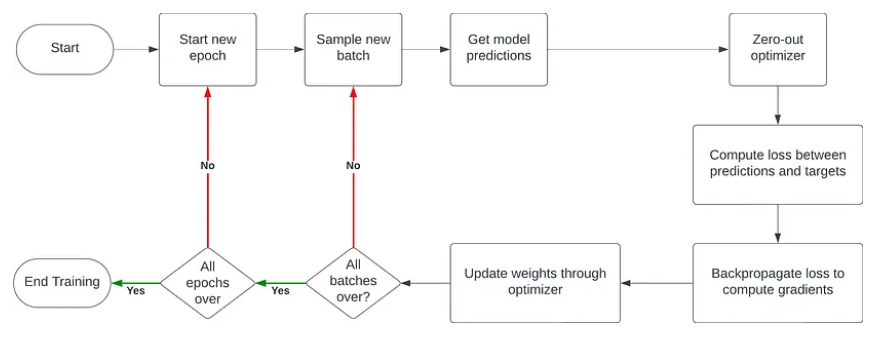

Done with epoch 1 - Training loss for epoch 1 : 1.0921344856421153
Done with epoch 2 - Training loss for epoch 2 : 0.7992620964845022
Done with epoch 3 - Training loss for epoch 3 : 0.6551779458920161
Done with epoch 4 - Training loss for epoch 4 : 0.576676532626152
Done with epoch 5 - Training loss for epoch 5 : 0.5208418716986974
Done with epoch 6 - Training loss for epoch 6 : 0.4746614595254262
Done with epoch 7 - Training loss for epoch 7 : 0.43615523477395374
Done with epoch 8 - Training loss for epoch 8 : 0.4017089406649272
Done with epoch 9 - Training loss for epoch 9 : 0.3711993743975957
Done with epoch 10 - Training loss for epoch 10 : 0.34215016414721805
Done with epoch 11 - Training loss for epoch 11 : 0.31681624551614124
Done with epoch 12 - Training loss for epoch 12 : 0.29323579619328183
Done with epoch 13 - Training loss for epoch 13 : 0.272714726626873
Done with epoch 14 - Training loss for epoch 14 : 0.2539134720961253
Done with epoch 15 - Training loss for epoch 15 : 

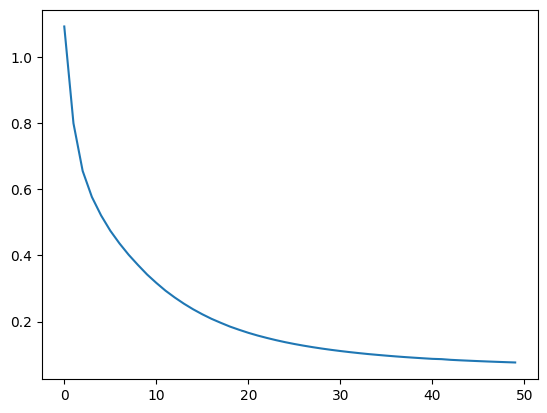

In [15]:
import matplotlib.pyplot as plt

epochs = 50
batch_size = 16
num_batches = len(train_X) // batch_size
epoch_losses = []
start_time = time.time()
for e in range(epochs):
  epoch_loss = 0
  for batch in range(num_batches+1):
    start = batch * batch_size
    end = start + batch_size
    x = torch.tensor(train_X[start:end]).float()
    y = torch.tensor(train_y[start:end]).long()
    predictions = model(x)
    loss = criterion(predictions, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item()

  epoch_loss /= num_batches
  epoch_losses.append(epoch_loss)
  print(f"Done with epoch {e+1} - Training loss for epoch {e+1} : {epoch_loss}")

end_time = time.time()
et = end_time - start_time
print(f"PyTorch Training took {et} seconds.")
plt.plot(epoch_losses)

You could add metric monitoring, a separate validation loop, progress bars (even though they’re quite unnecessary for this model), and much more. The only drawback: you have to add them! While that isn’t too tough, it adds to the time needed for development.

### Keras

In [16]:
inputs = tf.keras.Input(shape=(4,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer=tf.keras.optimizers.RMSprop(1e-3),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=[
        'accuracy',
    ]
)

In [ ]:
#  start_time = time.time()
#  model.fit(x=train_X, y=train_y, epochs=50, batch_size = 16)
#  end_time = time.time()
# et = end_time - start_time
# print(f"TensorFlow 'fit' loop took {et} seconds.")

Epoch 1/50
7/7 [==============================] - 1s 4ms/step - loss: 1.9640 - accuracy: 0.5900
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 1.6586 - accuracy: 0.6000
Epoch 3/50
7/7 [==============================] - 0s 5ms/step - loss: 1.4210 - accuracy: 0.6100
Epoch 4/50
7/7 [==============================] - 0s 5ms/step - loss: 1.2343 - accuracy: 0.6200
Epoch 5/50
7/7 [==============================] - 0s 4ms/step - loss: 1.1124 - accuracy: 0.6300
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 1.0199 - accuracy: 0.6400
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.9622 - accuracy: 0.6100
Epoch 8/50
7/7 [==============================] - 0s 5ms/step - loss: 0.9298 - accuracy: 0.5800
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 0.9005 - accuracy: 0.6500
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 0.8762 - accuracy: 0.6600
Epoch 11/50
7/7 [======================

Keras makes it extremely easy to use validation data by defining the aforementioned proportion as a float between 0 and 1. Alternatively, a separate validation dataset may be provided.

In [17]:
# note that this will consdierably longer as we are also performing a
# validation loop

start_time = time.time()
history = model.fit(x=train_X, y=train_y, epochs=50, validation_split=0.3)
end_time = time.time()
et = end_time - start_time
print(f"TensorFlow 'fit' loop took {et} seconds.")

Epoch 1/50
3/3 [==============================] - 5s 105ms/step - loss: 1.4433 - accuracy: 0.6429 - val_loss: 1.4517 - val_accuracy: 0.6000
Epoch 2/50
3/3 [==============================] - 0s 22ms/step - loss: 1.3198 - accuracy: 0.6429 - val_loss: 1.3358 - val_accuracy: 0.6000
Epoch 3/50
3/3 [==============================] - 0s 16ms/step - loss: 1.2263 - accuracy: 0.6429 - val_loss: 1.2339 - val_accuracy: 0.6000
Epoch 4/50
3/3 [==============================] - 0s 15ms/step - loss: 1.1455 - accuracy: 0.6429 - val_loss: 1.1769 - val_accuracy: 0.6000
Epoch 5/50
3/3 [==============================] - 0s 17ms/step - loss: 1.0979 - accuracy: 0.6429 - val_loss: 1.1240 - val_accuracy: 0.6000
Epoch 6/50
3/3 [==============================] - 0s 15ms/step - loss: 1.0520 - accuracy: 0.6429 - val_loss: 1.0501 - val_accuracy: 0.6000
Epoch 7/50
3/3 [==============================] - 0s 15ms/step - loss: 0.9957 - accuracy: 0.6429 - val_loss: 0.9974 - val_accuracy: 0.6000
Epoch 8/50
3/3 [==========

A training loss progression plot can be made using the History object returned from the fit() method, which contains the dictionary of the same name history

In [20]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

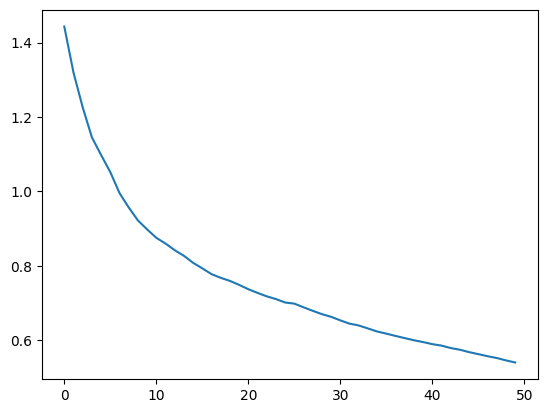

In [21]:
plt.plot(history.history["loss"])


### Custom Training Loop

Custom training loops may be constructed with Tensorflow, however they need a little more work than those written with PyTorch. First of all, it needs the usage of context managers. Secondly, Tensorflow function calls require the input of parameters, which might be confusing in contrast to PyTorch's straightforward function calls for gradient computation and weight updates.

Unlike PyTorch which uses a dynamic computation graph, Tensorflow needs to be told to start recording computations, gradients are explicitly computed between the loss function and model parameters, and the optimizer applies weight updates by pairing up each gradient with the corresponding model weight.

#### Slow (eager execution)

In [18]:
inputs = tf.keras.Input(shape=(4,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

optimizer=tf.keras.optimizers.RMSprop(1e-3)
loss=tf.keras.losses.SparseCategoricalCrossentropy()

epochs = 50
batch_size = 16
num_batches = len(train_X) // batch_size
epoch_losses = []
start_time = time.time()
for e in range(epochs):
  epoch_loss = 0
  for batch in range(num_batches+1):
    start = batch * batch_size
    end = start + batch_size
    x = train_X[start:end]
    y = train_y[start:end]

    with tf.GradientTape() as tape:
      predictions = model(x, training=True)
      loss_value = loss(y, predictions)

    #Calculate backpropagated gradients
    grads = tape.gradient(loss_value, model.trainable_weights)
    #Update the weights of the model with the calculated gradients
    optimizer.apply_gradients(zip(grads, model.trainable_weights))

    epoch_loss += loss_value

  epoch_loss /= num_batches
  print(f"Done with epoch - {e+1} - loss for epoch {epoch_loss}")
end_time = time.time()
et = end_time - start_time
print(f"Tensorflow loop took {et} seconds.")

Done with epoch - 1 - loss for epoch 1.3663301467895508
Done with epoch - 2 - loss for epoch 1.3011935949325562
Done with epoch - 3 - loss for epoch 1.2584322690963745
Done with epoch - 4 - loss for epoch 1.222546935081482
Done with epoch - 5 - loss for epoch 1.1904886960983276
Done with epoch - 6 - loss for epoch 1.1609543561935425
Done with epoch - 7 - loss for epoch 1.1333283185958862
Done with epoch - 8 - loss for epoch 1.1072497367858887
Done with epoch - 9 - loss for epoch 1.0819278955459595
Done with epoch - 10 - loss for epoch 1.0576198101043701
Done with epoch - 11 - loss for epoch 1.0335639715194702
Done with epoch - 12 - loss for epoch 1.0106309652328491
Done with epoch - 13 - loss for epoch 0.989794909954071
Done with epoch - 14 - loss for epoch 0.9729580283164978
Done with epoch - 15 - loss for epoch 0.9578254818916321
Done with epoch - 16 - loss for epoch 0.9433443546295166
Done with epoch - 17 - loss for epoch 0.9297739863395691
Done with epoch - 18 - loss for epoch 0.91

Another significant drawback is that it runs much slower compared to either fit() or the PyTorch training loop. This is due to Tensorflow's default runtime utilizing eager execution, which executes lines of code immediately instead of constructing a computation graph to be run all at once. While this is helpful for debugging, it leads to slower model training. Fortunately, this can be accelerated by isolating the model training logic into its own function and applying the __@tf.function__ decorator. This enables the creation of a computation graph that can be executed as a whole, resulting in substantial speed improvements.

#### Fast (deferred, graph execution)


Using the @tf.function decorator results in the training loop being upto 4-5 times faster than before!

In [19]:
@tf.function
def train_step(x, y):
  with tf.GradientTape() as tape:
      predictions = model(x, training=True)
      loss_value = loss(y, predictions)

    #Calculate backpropagated gradients
  grads = tape.gradient(loss_value, model.trainable_weights)
    #Update the weights of the model with the calculated gradients
  optimizer.apply_gradients(zip(grads, model.trainable_weights))
  return loss_value



inputs = tf.keras.Input(shape=(4,))
x = layers.Dense(units=8, activation="relu")(inputs)
x = layers.Dense(8, "relu")(x)
outputs = layers.Dense(3, "softmax")(x)

model = tf.keras.Model(inputs, outputs)

optimizer=tf.keras.optimizers.RMSprop(1e-3)
loss=tf.keras.losses.SparseCategoricalCrossentropy()

epochs = 50
batch_size = 16
num_batches = len(train_X) // batch_size
epoch_losses = []
start_time = time.time()
for e in range(epochs):
  epoch_loss = 0
  for batch in range(num_batches+1):
    start = batch * batch_size
    end = start + batch_size
    x = train_X[start:end]
    y = train_y[start:end]

    loss_value = train_step(x, y)

    epoch_loss += loss_value

  epoch_loss /= num_batches
  print(f"Done with epoch - {e+1} - loss for epoch {epoch_loss}")
end_time = time.time()
et = end_time - start_time
print(f"Tensorflow loop took {et} seconds.")

Done with epoch - 1 - loss for epoch 1.8306350708007812
Done with epoch - 2 - loss for epoch 1.711656928062439
Done with epoch - 3 - loss for epoch 1.6350302696228027
Done with epoch - 4 - loss for epoch 1.573958396911621
Done with epoch - 5 - loss for epoch 1.5225099325180054
Done with epoch - 6 - loss for epoch 1.47774076461792
Done with epoch - 7 - loss for epoch 1.43917977809906
Done with epoch - 8 - loss for epoch 1.405491828918457
Done with epoch - 9 - loss for epoch 1.3758906126022339
Done with epoch - 10 - loss for epoch 1.3493982553482056
Done with epoch - 11 - loss for epoch 1.3251367807388306
Done with epoch - 12 - loss for epoch 1.3028918504714966
Done with epoch - 13 - loss for epoch 1.2824209928512573
Done with epoch - 14 - loss for epoch 1.2638107538223267
Done with epoch - 15 - loss for epoch 1.2470722198486328
Done with epoch - 16 - loss for epoch 1.2321109771728516
Done with epoch - 17 - loss for epoch 1.2187119722366333
Done with epoch - 18 - loss for epoch 1.2066671